<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center><i>Algorithms for Discrete Mathematics</i>, year 2, semester 1</center>

# Experimental Maths 1: Primes and Euclid (with Solutions)


## Table of contents

- [1. Primes and factorization](#DistributionPrime)
 - [Prime numbers and divisibility](#DistributionPrime)
 - [Factorization](#Factorization)
 - [Euclid Algorithm and application](#EuclidAlgorithm)
- [2. Sums of squares](#SumsOfTwoSquares)
- [3. A mysterious function](#ChangeBasis)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [93]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import random

<a id="DistributionPrime"></a>
# Primes and factorization
## Prime numbers and divisibility

We aim to investigate the distribution of primes among integers. Namely, how many prime numbers are there (approximately) between $1$ and $n$?

<div markdown=1 class="DoIt"> 

Write a boolean function IsPrime($n$) which returns `True` if and only $n$ is prime.<br>
<i>(In python $a\ (\mathrm{mod}\ p)$ is obtained with `a%p`.)</i>

In [52]:
def IsPrime(n):
    # input: integer n
    # output: True or False depending on whether n is prime or not
    for i in range(2,n):
        if (n%i) ==0:   # found a factor
            return False
    return True
    
IsPrime(2)


True

Now we are ready for experiment. For $n\geq 2$, let $\pi(n)$ denote the number of primes less than $n$. For example, $\pi(11)=5$ since $2,3,5,7,11$ are prime.

<div markdown=1 class="DoIt">

1. Write a script which takes as input $n$ and returns the list $[\pi(2),\pi(3),\dots,\pi(n)]$.
2. Plot the function $n \mapsto \pi(n)$ (try $n=100,1000,10000$).

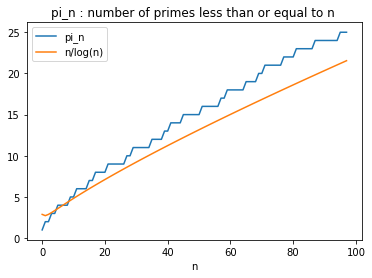

In [77]:
def list_pi_n(n):
    res = []
    for m in range(2,n+1):
        pi_m = 0
        for i in range(2,m+1):
            if IsPrime(i):
                pi_m +=1
        res.append(pi_m)
    return res

list_pi_n(11)



y = [list_pi_n(i)[-1] for i in range(2,100)]
z = [i/ log(i) for i in range(2,100)]
plt.title("pi_n : number of primes less than or equal to n ") 
plt.xlabel("n") 
plt.plot(y, label = "pi_n") 
plt.plot(z, label = "n/log(n)")
plt.legend()
plt.show()

<div markdown=1 class="DoIt"> Modify your previous plot to illustrate the <a href="https://en.wikipedia.org/wiki/Prime_number_theorem">Prime Number Theorem</a>:
$$
\pi(n)\sim \frac{n}{\log(n)}.
$$


<a id="Factorization"></a>
## Factorization

<div markdown=1 class="DoIt"> Write a function `Factorize(n)` which returns the factorization of `n` into primes. For example your function should return:

```python
Factorize(2158884)
[2, 2, 3, 3, 7, 13, 659]
```

<i>Hint: Think recursive!</i>

In [87]:
def Factorize(n):
    # input: integer n
    # output: list of factors of n
    if IsPrime(n):
        return [n]
    for i in range(2, n):
        if IsPrime(i):
            if n%i==0:
                return [i] + Factorize(int(n/i))          
Factorize(2158884)

[2, 2, 3, 3, 7, 13, 659]

For $n\geq 2$ we introduce 
$$
F(n)=\text{Number of prime factors of $n$, counted with multiplicity}. 
$$
For example, $F(2158884)=7$.

<div markdown=1 class="DoIt"> Plot the function $n \mapsto F(n)$ (try $n=100,1000,5000$).

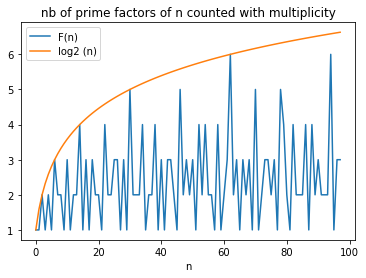

In [78]:

y = [len(Factorize(i)) for i in range(2,100)]
z = [log2(i) for i in range(2,100)]
plt.title(" nb of prime factors of n counted with multiplicity ") 
plt.xlabel("n") 
plt.plot(y, label = "F(n)") 
plt.plot(z, label = "log2 (n)")
plt.legend()
plt.show()

<div markdown=1 class="DoIt"> <b>(Theory)</b><br>

1. Plot on the previous picture $n\mapsto F(n)$ and $n\mapsto \log_2(n)$ (logarithm in basis two).
2. Prove the following: 
  - <b>(lower bound)</b> There are infinitely many $n$'s for which $F(n)=\log_2(n)$.
  - <b>(upper bound)</b> $F(n)\leq \log_2(n)$ for every $n$.


<div markdown=1 class="Answers"> 



lower bound:
F(n)=log2(n) implies that n = 2** (F(n)) . Since F(n) tends to infinity as n tends to infinity, so is 2**(F(n)). So there are infinitely many n's for which F(n)=log2(n).


upper bound:
We prove it by induction. 
for n=1, F(1) = log2(1)= 0
Assume it is true for a fixed k. Let us prove that F(k+1) <= log2(k+1)
F(n+1) <= F(n) + 1 because it is F(n) if n is no prime and F(n) +1 if n is prime
F(n+1) <= log2(n) + 1 by induction hypothesis
F(n+1) <= log2(n+1) by a property of logarithm
We have proved the induction.

<a id="EuclidAlgorithm"></a>
## The Euclid algorithm

We recall that Euclid's algorithm (which computes the gcd of two non-negative integers) relies on the fact that for every $a,b$ we have
$$
\begin{cases}
\mathrm{gcd}(a,b)&=\mathrm{gcd}(b,a\% b),\\
\mathrm{gcd}(a,0)&=a,\\
\end{cases}
$$
where $a\% b$ is the remainder of the euclidean division $a/b$.

<div markdown=1 class="DoIt">
Write a function `GreatestCommonDivisor(a,b)` which returns $\mathrm{gcd}(a,b)$ using the Euclid algorithm.

In [90]:
def GreatestCommonDivisor(a,b):
    # input: a,b: non-negative integers
    # output: returns the gcd of a and b
    
    if b==0:
        return a
    return GreatestCommonDivisor(b, a%b)


GreatestCommonDivisor(54,225)

9

Integers $m,n$ are said to be <i>coprime</i> if $\mathrm{gcd}(m,n)=1$. For example, $14,9$ are coprime.

In many references (see e.g. <a href="https://en.wikipedia.org/wiki/Coprime_integers#Probability_of_coprimality">Wikipedia</a>) one can read that
<center>
    "<i>The probability that two numbers randomly chosen are coprime is $\frac{6}{\pi^2}$.</i>"
</center>
Yet there is no obvious way to rigorously define what are "two numbers randomly chosen". A possible interpretation is the following:
$$
\frac{\mathrm{card}\left\{(i,j)\in[1,n]^2\text{ such that }\mathrm{gcd}(i,j)=1\right\}}{\mathrm{card}\left\{(i,j)\in[1,n]^2\right\}} \stackrel{n\to +\infty}{\to} \frac{6}{\pi^2}.
$$

<div markdown=1 class="DoIt"> 
Use your function `GreatestCommonDivisor` to draw a plot which illustrates the above convergence towards $\frac{6}{\pi^2}$ ($n=200$ should be enough).

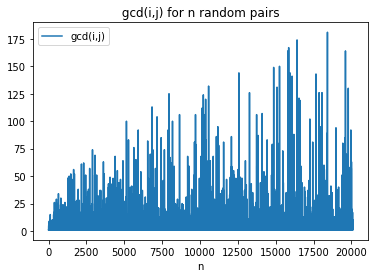

In [102]:
def random_pair(n):
    res = []
    for _ in range(n):
        res.append([random.randint(1,n), random.randint(1,n)])
    return res


def y(n):
    res = []
    for m in range(2,n+1):
        for i,j in random_pair(m):
            res.append(GreatestCommonDivisor(i,j))
    return res

y = y(200)
plt.title(" gcd(i,j) for n random pairs ") 
plt.xlabel("n") 
plt.plot(y, label = "gcd(i,j)") 
plt.legend()
plt.show()

<div markdown=1 class="DoIt"> Write a function `GreatestCommonDivisor_3(a,b,c)` which returns the gcd of three numbers.

<a id="SumsOfTwoSquares"></a>
# 2. Sums of squares

We say that $n$ is a sum of two squares if there exist two integers $a,b\geq 1$ such that
$$
n=a^2+b^2.
$$
For example, $10=3^2+1^2$ is a sum of two squares while $11$ is not.

<div markdown=1 class="DoIt"> 

Write a function `SumsOfTwoSquares(n)` which returns the list of all decompositions of $n$ as a sum of two squares. For example:
```python
SumsOfTwoSquares(905)
[[8, 29], [11, 28], [28, 11], [29, 8]]
SumsOfTwoSquares(11)
[]
```

<div markdown=1 class="DoIt"> Find the smallest integer $n$ which has strictly more than $7$ decompositions as a sum of two squares.

<div markdown=1 class="DoIt"> 

1. <b>(Theory)</b> Let $a$ be any integer. Prove that $a^2$ is always equal to $0$ or $1$ modulo $4$. 
2. <b>(Theory)</b> Deduce that $\bigg(n\equiv 3 \ (\mathrm{mod}\ 4)\bigg)$ $\Rightarrow$ $\bigg( n\text{ is not a sum of two squares }\bigg)$.<br>
3. Is the converse true?

<div markdown=1 class="Answers">


<a id="ChangeBasis"></a>
# 3. Bonus: A mysterious function

<div markdown=1 class="DoIt"> What does the following function return? Can you prove it?

In [6]:
def Mystery(MysteriousVariable):
    # input: ???
    # output: ???
    if MysteriousVariable==0:
        return []
    else:
        return Mystery(MysteriousVariable//2) + [MysteriousVariable%2]
    

<div markdown=1 class="Answers"> 

## Change of basis

<div markdown=1 class="DoIt"> Write a function `ChangeBasis(a,b,n_InBasis_a)` which takes as inputs:
* Two basis $a,b$ (integers $\geq 2$)
* A list which gives the decomposition of some integer $n$ in basis $a$

and which returns the decomposition of $n$ in basis $b$.

For example
```python
ChangeBasis(5,2,[4,1])
[1, 0, 1, 0, 1]
```
(Since $[4,1]$ in basis $5$ is $21$ <i>i.e.</i> $[1, 0, 1, 0, 1]$.)